In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

cancer = load_breast_cancer()
X, y = scale(cancer.data), cancer.target
X.shape

(569, 30)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train[:, :2], y_train)

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

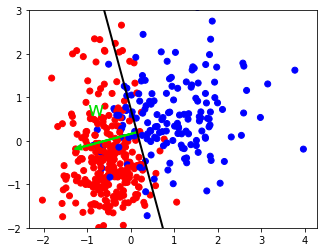

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]
plt.plot(line2, line, c='k', linewidth=2)
plt.arrow(line2[20], line[20], .4 * coef[0], .4 * coef[1], color='#00dd00', linewidth=2, head_width=.1)
plt.text(-1, .6, "w", color='#00dd00', fontsize=20)
plt.ylim(-2, 3)
plt.gca().set_aspect("equal")
plt.savefig("images/linear_boundary_vector.png")

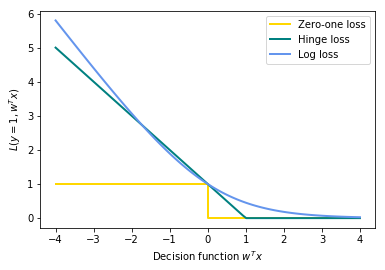

In [5]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
#plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
#         label="Squared hinge loss")

#plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $w^Tx$")
plt.ylabel("$L(y=1, w^Tx) $")
plt.savefig("images/binary_loss.png")

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


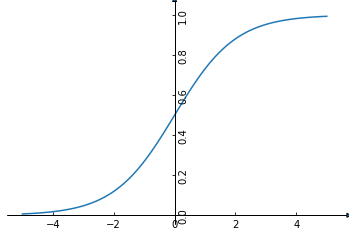

In [6]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

line =  np.linspace(-5, 5, 100)   
ax.plot(line, 1. / (1 + np.exp(-line)))

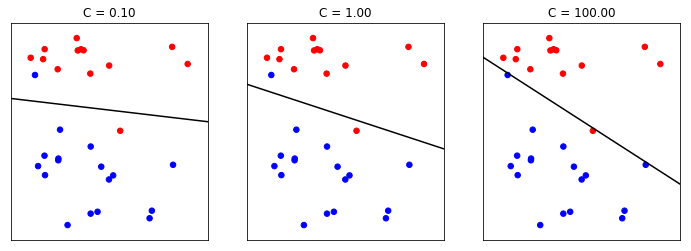

In [9]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

for ax, C in zip(axes, [1e-1, 1, 1e2]):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=30)

    svm = LogisticRegression(solver='lbfgs', C=C, tol=0.00001).fit(X, y)
    # using SVC instead of LinearSVC so we can get support vectors more easily
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(6, 13)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = %.2f" % C)
plt.savefig("images/logreg_regularization.png")

# Multiclass

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

(150, 4)
[50 50 50]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y)
linearsvm = LinearSVC().fit(X, y)
print(logreg.coef_.shape)
print(linearsvm.coef_.shape)

(3, 4)
(3, 4)


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:948: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:927: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
logreg.coef_

array([[-0.41820958,  0.96636519, -2.52091255, -1.08411728],
       [ 0.53016207, -0.31443054, -0.19959703, -0.94793851],
       [-0.11195249, -0.65193465,  2.72050958,  2.03205579]])

In [13]:
logreg.intercept_

array([  9.83784241,   2.21927241, -12.05711482])

In [14]:
from sklearn.preprocessing import scale
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs").fit(scale(X), y)

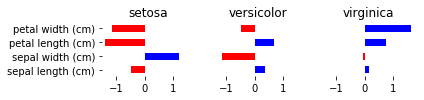

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()


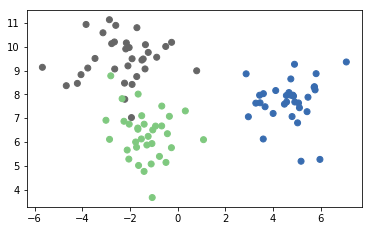

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
ax = plt.gca()
ax.set_aspect("equal")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# OVR

In [17]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100).fit(X, y)

/home/andy/checkout/scikit-learn/sklearn/svm/base.py:927: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


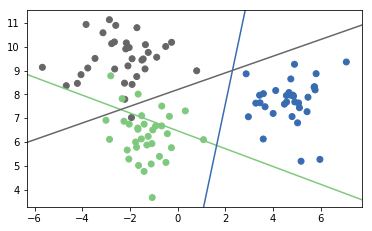

In [18]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.gca().set_aspect("equal")
plt.xlim(xlim)
plt.ylim(ylim)
plt.savefig("images/ovr_lines.png")

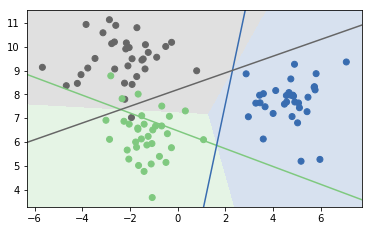

In [19]:
import matplotlib as mpl

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovr_boundaries.png")

# OVO

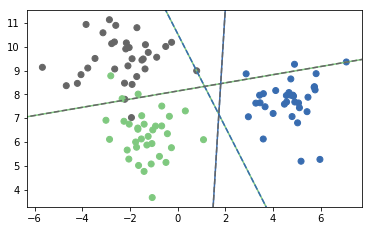

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=100).fit(X, y)
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
classes = [(0, 1), (0, 2), (1, 2)]
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovo_lines.png")

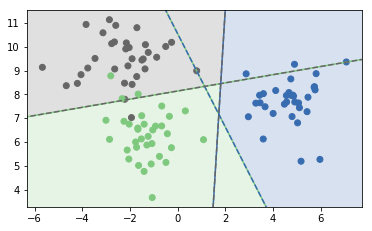

In [21]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

svm = SVC(kernel="linear", C=100).fit(X, y)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("images/ovo_boundaries.png")

# kernel SVMS

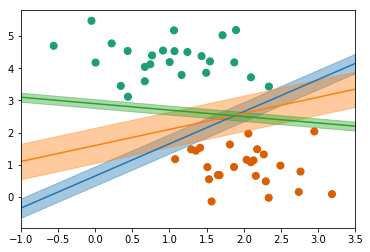

In [22]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y), s=50);
plt.xlim(-.6, 3.5)

xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.14)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     alpha=0.4, color=line.get_color())

plt.xlim(-1, 3.5)
plt.savefig("images/max_margin.png")

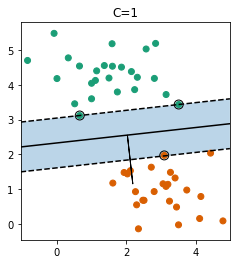

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title("C=1")
plt.savefig("images/max_margin_C_1.png")

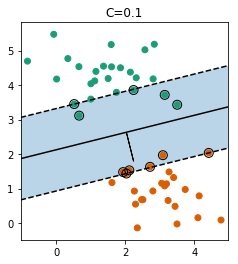

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.gca().set_aspect("equal")
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")

plt.xlim(xx[0], xx[-1])
plt.title("C=0.1")
plt.savefig("images/max_margin_C_0.1.png")

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

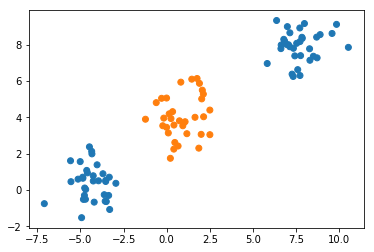

In [28]:
X, y = make_blobs(random_state=3)
y = (y == 0).astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))

In [29]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

In [30]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [31]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [32]:
linear_svm = SVC(kernel="linear").fit(X_poly, y)
poly_svm = SVC(kernel="poly", degree=2, coef0=1).fit(X, y)

/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
linear_svm.coef_

array([[ 0.13850605,  0.05989699, -0.20119627,  0.0484241 ,  0.01907115]])

In [34]:
linear_svm.dual_coef_

array([[-0.02957404, -0.00341814,  0.00254448,  0.03044769]])

In [35]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

In [36]:
poly_svm.dual_coef_

array([[-0.05694295, -0.00039178, -0.01200193,  0.00760712,  0.06172954]])

In [37]:
poly_svm.support_

array([ 1, 26, 41, 42, 62], dtype=int32)

In [38]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

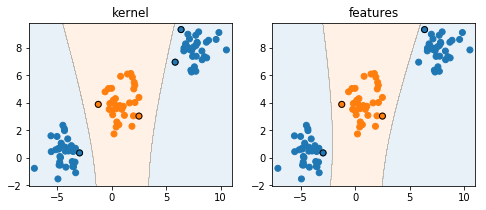

In [42]:
from sklearn.pipeline import make_pipeline
colors = [plt.cm.tab10(0), plt.cm.tab10(0), plt.cm.tab10(1), plt.cm.tab10(1)]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for ax, model, name in zip(axes, [poly_svm, make_pipeline(poly, linear_svm)], ["kernel", "features"]):
    ax.set_title(name)
    support_vectors = getattr(model, "support_", None)
    if support_vectors is None:
        support_vectors = model.steps[1][1].support_
    predictions = model.predict(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.1, colors=colors)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1)
    ax.set_xlim(x_lin[0], x_lin[-1])
    ax.set_ylim(y_lin[0], y_lin[-1])
plt.savefig("images/poly_kernel_features.png")

# Scaling with number of samples

In [43]:
from time import time
from sklearn.svm import LinearSVC

linear, kernel = [], []
samples = [100, 1000, 10000, 100000] #, 1e6, 1e7]
for n_samples in samples:
    X, y = make_blobs(n_samples=int(n_samples), random_state=0)
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(dual=False).fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1).fit(X, y)
    kernel.append(time() - tick)

/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will chan

In [44]:
kernel

[0.0030889511108398438,
 0.015126228332519531,
 0.7869727611541748,
 61.51931095123291]

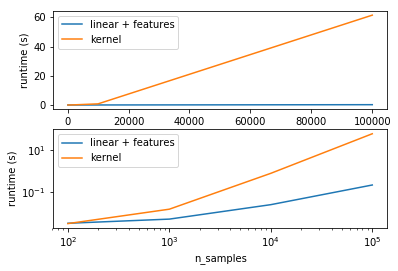

In [45]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(samples, linear, label="linear + features")
    ax.plot(samples, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("n_samples")
    ax.legend()
axes[1].set_xscale("log")
axes[1].set_yscale("log")

# Scaling with n_features # FIXME NOT VERY GOOD

In [46]:
from sklearn.datasets import make_classification
linear, kernel = [], []
features = []
for n_features in features:
    X, y = make_classification(n_samples=10000, random_state=0, n_features=int(n_features))
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(loss="hinge").fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1).fit(X, y)
    kernel.append(time() - tick)

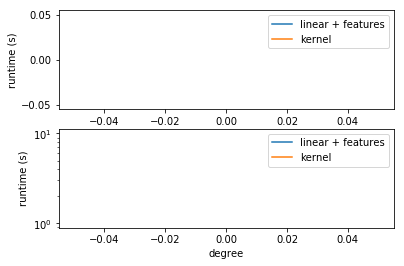

In [47]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(features, linear, label="linear + features")
    ax.plot(features, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("degree")
    ax.legend()
axes[1].set_yscale("log")

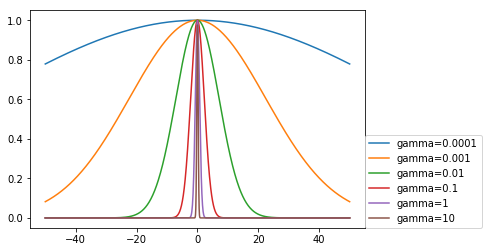

In [48]:
line = np.linspace(-50, 50, 1000)
def rbf(gamma):
    return np.exp(-gamma * line**2)

for gamma in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    plt.plot(line, rbf(gamma), label="gamma={}".format(gamma))
plt.legend(loc=(1, 0))

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/home/andy/anaconda3/envs/py37/lib/pytho

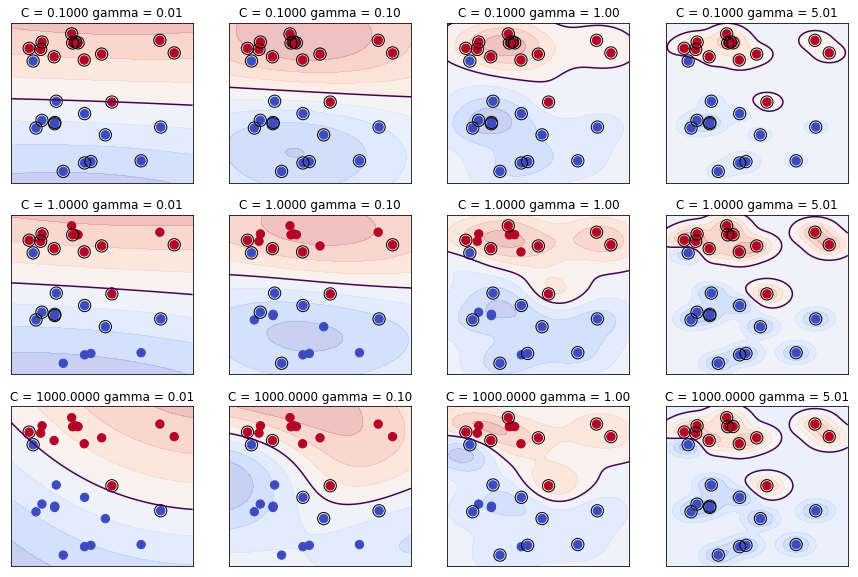

In [51]:
colors = [plt.cm.tab10(0), plt.cm.tab10(0), plt.cm.tab10(1), plt.cm.tab10(1)]

def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

def plot_svm(log_C, log_gamma, ax=None):
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    predictions = svm.decision_function(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.3, cmap='coolwarm') #, colors=colors)
    ax.contour(x_grid, y_grid, predictions.reshape(x_grid.shape), levels=[0])

    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='coolwarm')
    # plot support vectors
    support_vectors = svm.support_
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1, s=150)
    ax.set_title("C = %.4f gamma = %.2f" % (C, gamma))

X, y = make_handcrafted_dataset()

# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
    
fig, axes = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'xticks':(), 'yticks': ()})

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, [-2, -1, 0, .7]):
        plot_svm(log_C=C, log_gamma=gamma, ax=a)

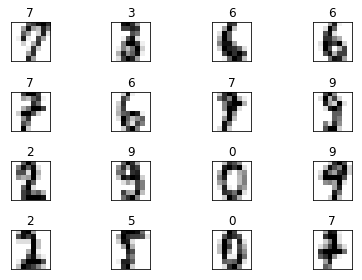

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(X_train, y_train, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

In [55]:
scaled_svc = make_pipeline(StandardScaler(), SVC())
print(np.mean(cross_val_score(SVC(), X_train, y_train, cv=10)))
print(np.mean(cross_val_score(scaled_svc, X_train, y_train, cv=10)))

/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will chan

0.5782822352987651


/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will chan

0.9784508061691609


In [59]:
# X_train.std() is also good for global scaling - if the features were on the same scale.
# this dataset is very atypical.
print(np.mean(cross_val_score(SVC(gamma=(1. / (X_train.shape[1] * X_train.var()))), X_train, y_train, cv=10)))

0.9864804109275003


In [60]:
np.set_printoptions(precision=6, suppress=True)
# using pipeline of scaler and SVC. Could also use SVC and rescale gamma
param_grid = {'svc__C': np.logspace(-3, 2, 6),
              'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
param_grid

{'svc__C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 'svc__gamma': array([0.000001, 0.000007, 0.000074, 0.000742, 0.007424, 0.074239])}

In [61]:
grid = GridSearchCV(scaled_svc, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:816: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))]),
      

In [62]:
results = pd.DataFrame(grid.cv_results_)
results.head()

NameError: name 'pd' is not defined

In [ ]:
plt.title("testing accuracy")
plt.imshow(results.mean_test_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

In [ ]:
plt.title("training accuracy")
plt.imshow(results.mean_train_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

In [ ]:
from sklearn.kernel_approximationmation import RBFSampler
gamma = grid.best_params_['svc__gamma']
approx_rbf = RBFSampler(gamma=gamma, n_features=100)
approx_rbf.tran

In [ ]:
"""
===================================================================
Support Vector Regression (SVR) using linear and non-linear kernels
===================================================================

Toy example of 1D regression using linear, polynomial and RBF kernels.

"""
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plt.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolor="none", edgecolor="k", marker='8',
            label='rbf support vectors', s=100)
plt.scatter(X[svr_poly.support_], y[svr_poly.support_], facecolor="none", edgecolor="k", marker='s',
            label='poly support vectors', s=100)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

In [ ]:
from sklearn.kernel_approximation import RBFSampler
gamma = 1. / (X_train.shape[1] * X_train.var())
approx_rbf = RBFSampler(gamma=gamma, n_components=5000)
print(X_train.shape)
X_train_rbf = approx_rbf.fit_transform(X_train)
print(X_train_rbf.shape)

In [ ]:
np.mean(cross_val_score(LinearSVC(), X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(SVC(gamma=gamma), X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(LinearSVC(), X_train_rbf, y_train, cv=10))

In [ ]:
from sklearn.kernel_approximation import Nystroem
nystroem = Nystroem(gamma=gamma, n_components=200)
X_train_ny = nystroem.fit_transform(X_train)
print(X_train_ny.shape)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
np.mean(cross_val_score(LinearSVC(), X_train_ny, y_train, cv=10))

In [ ]:
rng = np.random.RandomState(0)
w = rng.normal(size=(X_train.shape[1], 100))
X_train_wat = np.tanh(scale(np.dot(X_train, w)))
print(X_train_wat.shape)

In [ ]:
np.mean(cross_val_score(LinearSVC(), X_train_wat, y_train, cv=10))